# **Stock Price Prediction**

**Importing Libraries**

In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

**Loading Trainig Dataset**

In [71]:
dataset = pd.read_csv('Downloads/Minor Project Data set (Stock Price Prediction).csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


**Training the model**

In [73]:
training_set = dataset.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[262.      ]
 [247.699997]
 [266.579987]
 ...
 [448.25    ]
 [421.440002]
 [407.309998]]
(1009, 1)


In [74]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.06125254],
       [0.03005911],
       [0.07124314],
       ...,
       [0.46753051],
       [0.4090483 ],
       [0.3782257 ]])

In [75]:
x_train = []
y_train = []
for i in range(100,1009):
    x_train.append(scaled_training_set[i-100:i,0])
    y_train.append(scaled_training_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [76]:
print(x_train.shape)
print(y_train.shape)

(909, 100)
(909,)


In [77]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(909, 100, 1)

In [78]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

**Fitting the model**

In [79]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 14s 167ms/step - loss: 0.0402
Epoch 2/100
29/29 [==============================] - 5s 167ms/step - loss: 0.0099
Epoch 3/100
29/29 [==============================] - 5s 158ms/step - loss: 0.0083
Epoch 4/100
29/29 [==============================] - 5s 171ms/step - loss: 0.0076
Epoch 5/100
29/29 [==============================] - 6s 204ms/step - loss: 0.0066
Epoch 6/100
29/29 [==============================] - 5s 176ms/step - loss: 0.0069
Epoch 7/100
29/29 [==============================] - 5s 174ms/step - loss: 0.0063
Epoch 8/100
29/29 [==============================] - 5s 175ms/step - loss: 0.0065
Epoch 9/100
29/29 [==============================] - 5s 175ms/step - loss: 0.0068
Epoch 10/100
29/29 [==============================] - 5s 174ms/step - loss: 0.0057
Epoch 11/100
29/29 [==============================] - 5s 170ms/step - loss: 0.0058
Epoch 12/100
29/29 [==============================] - 5s 172ms/step - loss: 0.0057
Epoch 13/100

**Loss during epoch**

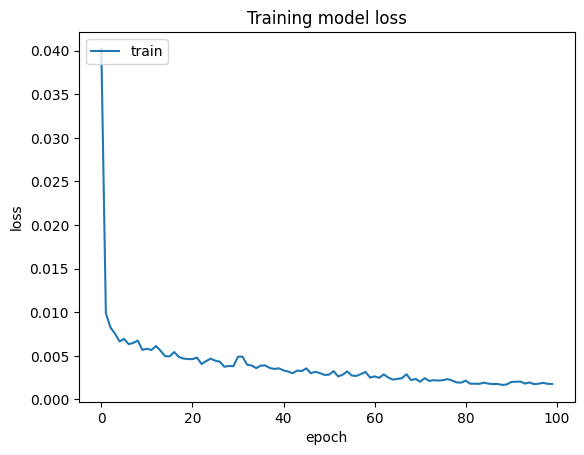

In [81]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'],loc = 'upper left')
plt.show()

In [99]:
dataset_test = pd.read_csv('Downloads/Minor Project Data set (Stock Price Prediction).csv')
actual_stock_price = dataset_test.iloc[:100,1:2].values

In [100]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-100:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(100,200):
    x_test.append(inputs[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [101]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

4/4 [==============================] - 0s 58ms/step


**Plotting the graph**

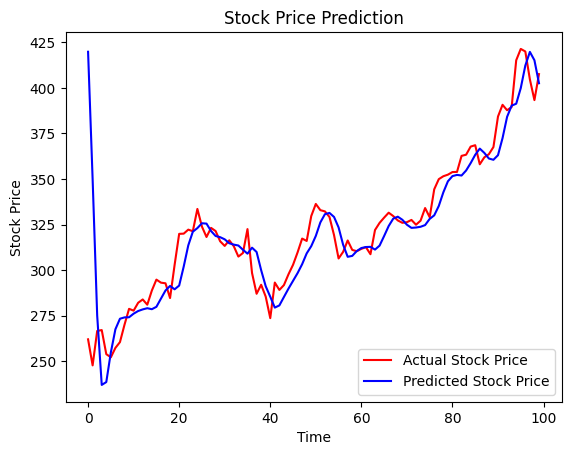

In [102]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()